[View in Colaboratory](https://colab.research.google.com/github/restrepo/WOSplus/blob/master/test_sample.ipynb)

In [ ]:
%%bash
# Check if colaboratory was launched and install missing requirements
if [ "$(pwd)" == /content ];then
    pip install openpyxl xlrd unidecode python-levenshtein requests_testadapter > /dev/null
    git clone https://github.com/restrepo/WOSplus.git > /dev/null
    #mv WOSplus/wosplus/* .
fi

In [ ]:
import os
if os.getcwd()== '/content':
    os.chdir('WOSplus')

In [1]:
import wosplus

In [2]:
%%writefile drive.cfg
[FILES]
Sample_WOS.xlsx = 1--LJZ4mYyQcaJ93xBdbnYj-ZzdjO2Wq2
Sample_SCI.xlsx = 1-3a-hguQTk5ko8JRLCx--EKaslxGVscf
Sample_SCP.xlsx = 1-IAWlMdp2U-9L2jvZUio04ub1Ym3PX-H

Overwriting drive.cfg


In [3]:
cib=wosplus.wosplus('drive.cfg')

cib.load_biblio('Sample_WOS.xlsx')
cib.load_biblio('Sample_SCI.xlsx',prefix='SCI')
cib.load_biblio('Sample_SCP.xlsx',prefix='SCP')

print('before merge: {}'.format( cib.WOS.shape[0]+cib.SCI.shape[0]+cib.SCP.shape[0] )  )

cib.merge(left='WOS',right='SCI')

if True:
    print('intial: {}'.format( cib.WOS.shape[0]+cib.SCI.shape[0]) )
    print('final : {}'.format(  cib.WOS_SCI.shape) )

cib.merge(left='WOS_SCI',right='SCP')

if True:
    print('intial: {}'.format( cib.WOS_SCI.shape[0]+cib.SCP.shape[0]) )
    print('final : {}'.format(  cib.WOS_SCI_SCP.shape) )
    
cib.merge(left='WOS',right='SCP')

if True:
    print('intial: {}'.format( cib.WOS.shape[0]+cib.SCP.shape[0]) )
    print('final : {}'.format(  cib.WOS_SCP.shape) )
    
cib.merge(left='SCI',right='SCP')

if True:
    print('intial: {}'.format( cib.SCP.shape[0]+cib.SCI.shape[0]) )
    print('final : {}'.format(  cib.SCI_SCP.shape) )

before merge: 48
.intial: 38
final : (28, 96)
..intial: 38
final : (30, 142)
..intial: 37
final : (29, 105)
..intial: 21
final : (15, 89)


before merge: 48
.intial: 38
final : (28, 96)
..intial: 38
final : (30, 142)

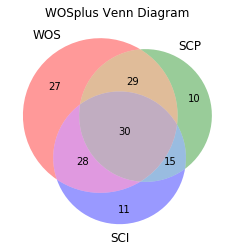

In [4]:
cib.plot_sets()

## Unitary tests
Copy to test.py:
```bash
cd tests
python test.py
```

In [ ]:
import unittest
self = unittest.TestCase('__init__')
self.assertTrue(True)

self.assertTrue( cib.WOS.shape[0]+cib.SCI.shape[0]+cib.SCP.shape[0] == 48 )
                  
self.assertTrue ( cib.WOS.shape[0]+cib.SCI.shape[0] == 38  )
self.assertTrue (  cib.WOS_SCI.shape[0] == 28 ) 
        
         
self.assertTrue( cib.WOS_SCI.shape[0]+cib.SCP.shape[0] == 38  )
self.assertTrue( cib.WOS_SCI_SCP.shape[0] == 30  )

self.assertTrue(list( cib.WOS_SCI_SCP.Tipo.values )==['WOS','WOS',
           'WOS','WOS','WOS','WOS','WOS_SCI','SCI','WOS','WOS','WOS','WOS',
           'WOS','WOS','WOS','WOS','WOS','WOS_SCI','WOS_SCI','WOS_SCI',
           'WOS_SCP','WOS_SCI_SCP','WOS_SCI_SCP','WOS_SCI_SCP','WOS_SCP',
           'WOS_SCI_SCP','WOS_SCI_SCP','WOS_SCI_SCP','SCP','SCP'])

In [ ]:
%%bash
cd tests
python3 test.py

### In progress... Other database

In [ ]:
cib.load_biblio('Sample_SCP.xlsx',prefix='NEW')

In [ ]:
cib.merge(left='WOS_SCI_SCP',right='NEW',right_DOI='NEW_DOI',
            right_TI='NEW_Title',
            right_extra_journal='NEW_Source title',
            right_author='NEW_Authors',
            right_year='NEW_Year')

In [ ]:
cib.WOS_SCI_SCP_NEW.shape